In [25]:
import pandas as pd
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [28]:
import seaborn as sns

In [29]:
import plotly.express as px

In [30]:
sns.set_style("whitegrid")

In [31]:
plt.rcParams["figure.figsize"] = (10,6)

In [40]:
file_path = r"C:\Users\DELL\Desktop\PowerBi\archive\employee_attrition.csv"

In [41]:
df = pd.read_csv(file_path)

In [42]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (1470, 35)


In [43]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptio

In [44]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel    

In [45]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [48]:
df = df.drop_duplicates()

In [50]:
df["AttritionFlag"] = df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

In [51]:
print("\nUnique Values:\n", df["Attrition"].value_counts())


Unique Values:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


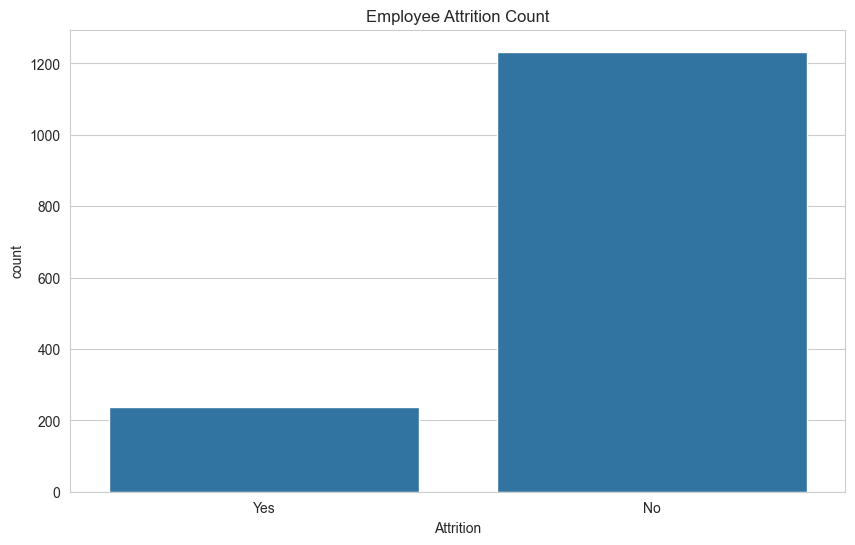

In [53]:
plt.figure()
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Count")
plt.show()

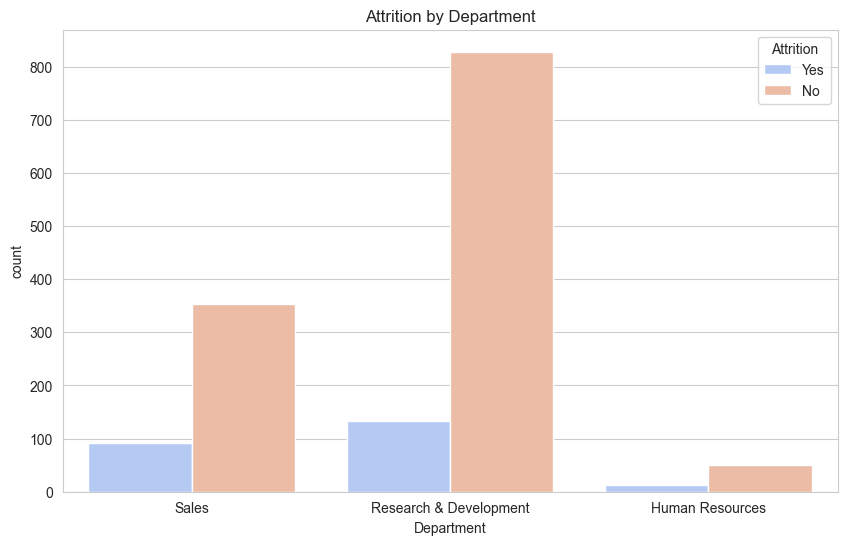

In [54]:
plt.figure()
sns.countplot(x="Department", hue="Attrition", data=df, palette="coolwarm")
plt.title("Attrition by Department")
plt.show()

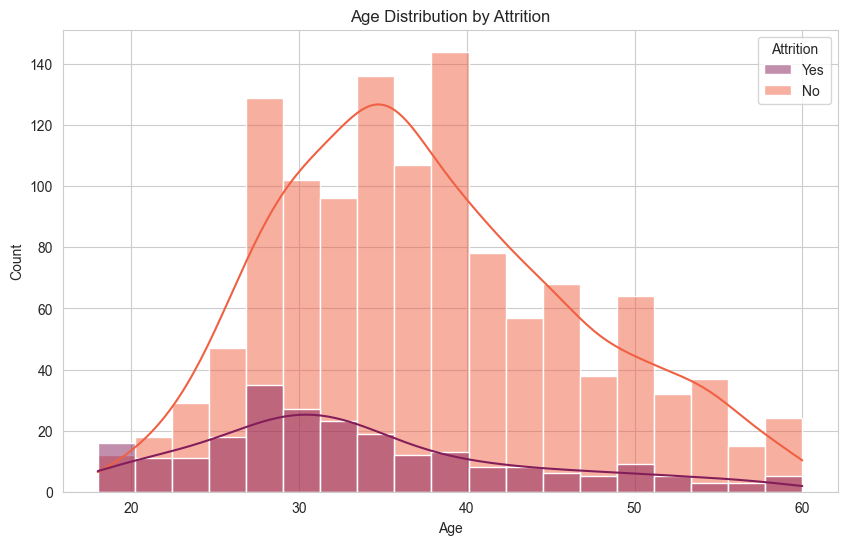

In [55]:
plt.figure()
sns.histplot(data=df, x="Age", hue="Attrition", kde=True, palette="rocket")
plt.title("Age Distribution by Attrition")
plt.show()

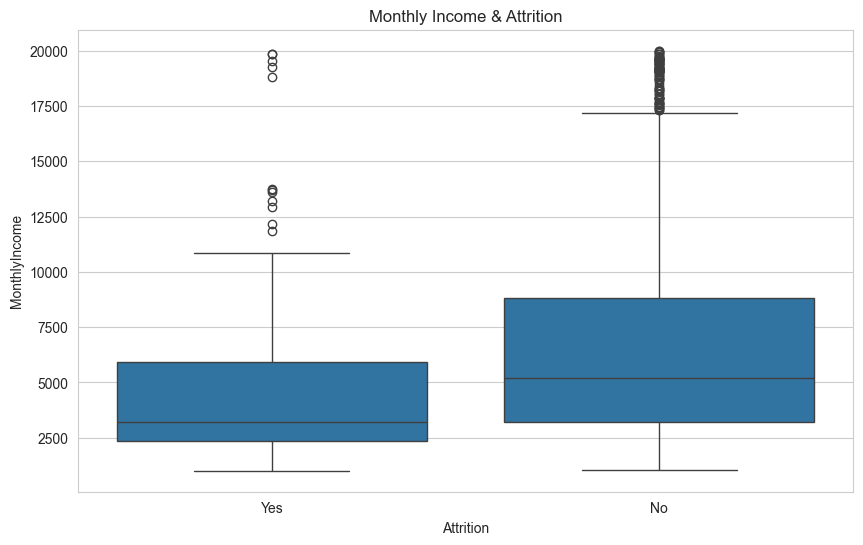

In [57]:
plt.figure()
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income & Attrition")
plt.show()

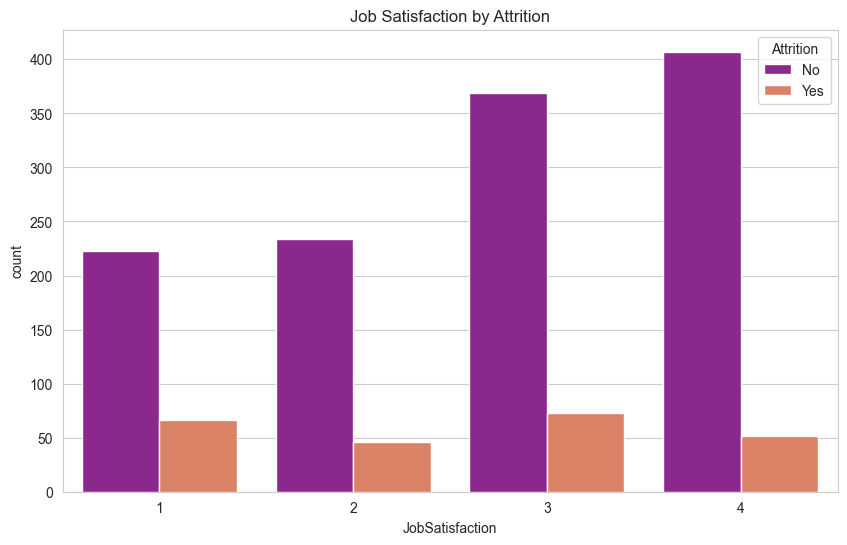

In [58]:
plt.figure()
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette="plasma")
plt.title("Job Satisfaction by Attrition")
plt.show()

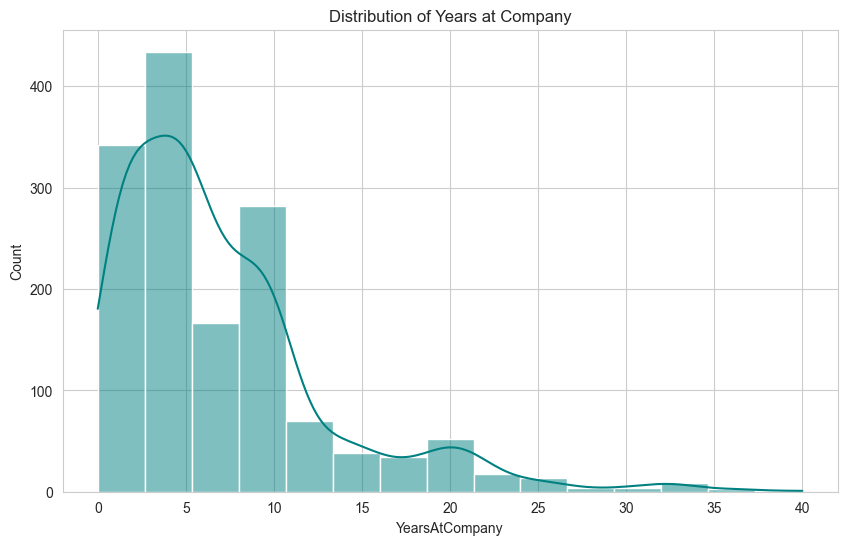

In [59]:
plt.figure()
sns.histplot(df["YearsAtCompany"], bins=15, kde=True, color="teal")
plt.title("Distribution of Years at Company")
plt.show()

In [61]:
df["AttritionFlag"] = df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

In [62]:
df_numeric = df.copy()
categorical_cols = df_numeric.select_dtypes(include='object').columns
for col in categorical_cols:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

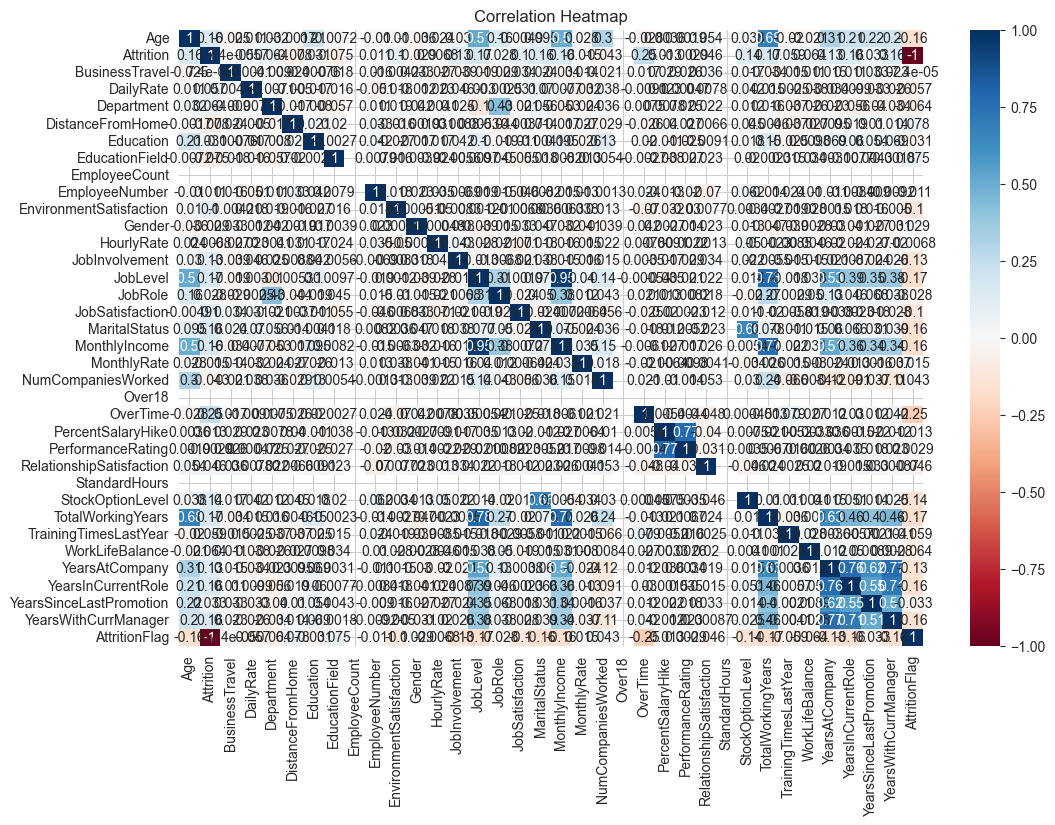

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="RdBu")
plt.title("Correlation Heatmap")
plt.show()

In [68]:
import plotly.io as pio
pio.renderers.default = "notebook"

fig = px.histogram(
    df,
    x="Age",
    color="Attrition",
    title="Interactive Age Distribution by Attrition",
    labels={"Attrition":"Attrition Status"},
    nbins=30
)
fig.show()

In [69]:
fig2 = px.box(
    df,
    x="Attrition",
    y="MonthlyIncome",
    title="Interactive Monthly Income by Attrition"
)
fig2.show()

In [70]:
print("\n Analysis Completed Successfully!")


 Analysis Completed Successfully!
